In this notebook, we visualize some sweep results.
We create boxplots for each noise levels and both models to see:
- The performance of both models
- How performance relate to the number of iterations/layers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wandb

import numpy as np
import seaborn as sns

import sys
BASE_PATH = globals()['_dh'][0].parent.absolute()
sys.path.insert(1, str(BASE_PATH))

from src.utils.wandb_analysis import get_sweep_info, get_clean_sweep_runs
wandb.login()

/Users/sizhuang/Desktop/GitHubRepos/IterativeMethods/iterENV/lib/python3.8/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
/Users/sizhuang/Desktop/GitHubRepos/IterativeMethods/iterENV/lib/python3.8/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
wandb: Currently logged in as: sizhuang. Use `wandb login --relogin` to force relogin


True

In [2]:
def get_boxplot(sweep_id, noise_level):
    df = get_clean_sweep_runs(sweep_id, model_name=None)
    plt.figure()
    bp = sns.boxplot(x='num_iter_layers',
            y="test_accuracy",
            data=df,
            width=0.5,
            flierprops={"marker": "x"},
            medianprops={"color": "red"},
            color="royalblue"
            )
    bp.set(title="noise level: "+str(noise_level), xlabel='Number of iterations/layers', ylabel='Test accuracy')
    sns.move_legend(bp, loc=(1.02, 1))

In [3]:
usual_sweeps = [
"yb9nj1j5", # noise 0, 100 data
"s29ovdjm", # noise 1, 100 data
"io2roeki", # noise 2, 100 data
"ni1y0i2n", # noise 3, 100 data
"c1v5292z", # noise 4, 100 data
"f3kaci4y", # noise 5, 100 data
"91g554g5", # noise 6, 100 data
"zgyfs4la"  # noise 7, 100 data
]

iterative_sweeps = [
"8b5samb8", # noise 0, 100 data
"4013a4eg", # noise 1, 100 data
"hewvhl9l", # noise 1, 200 data
"y4prhi94", # noise 2, 100 data
"yypt1ahv", # noise 2, 200 data
"el1u1dr4", # noise 3, 100 data
"n21z6vhb", # noise 3, 200 data
"4mlrggda", # noise 4, 100 data
"f5sg4zi7", # noise 4, 200 data
"x6nu6eip", # noise 4, 200 data
"qspwm421", # noise 5, 100 data
"2e6jew01", # noise 5, 200 data
"36x0z5q4", # noise 6, 100 data
"eyb0xbt1", # noise 6, 200 data
"823rcbn7", # noise 7, 100 data
"7etnd43p"  # noise 7, 200 data
]

variant_sweeps = [
"nhj93ccd", # noise 0, 100 data
"z35d1w5v", # noise 1, 100 data
"3qpjo1d3", # noise 2, 100 data
"uhno0u30", # noise 3, 100 data
"nm41at8u", # noise 4, 100 data
"4fq47kn0", # noise 5, 100 data
"9w9xq0qg", # noise 6, 100 data
"kj2gmoex"  # noise 7, 100 data
]

# the following list contains new sweeps that fix all hyperparameters except number of iterations/layers to 
iterative_sweeps_new = [
    "npqagdoe",
    "fbn61ca2",
    "9atukh0o",
    "3i2obz9l",
    "ic0hskuj",
    "g1jho213",
    "nnefje8j",
    "k8g0jcqg",
    "eypvgt5a",
    "rpdye1qv",
    "dpqr6d03",
    "kvx76htx",
    "sc74qok8",
    "98xetv9g",
    "hkdp23qh",
    "pr8zccth",
    "t5fm602l"
]

usual_sweeps_new = [
    "ajdn1ku3",
    "wpwawhmp",
    "2m3mssse",
    "3p8bp8cp",
    "fhyx3bbq",
    "mba8gfcz",
    "nr0x2ymu",
    "fue8e9t8",
    "ztmtmko3"
]

variant_sweeps_new = [
    "nlx35xhp",
    "tneqq6w2",
    "dxka4tsg",
    "9c28vxsu",
    "gvoklm8v",
    "ie77h8x0",
    "z5dtpgqd",
    "1yx7lryw",
    "p5z39rcd"
]


In [4]:
get_sweep_info(iterative_sweeps_new).sort_values(by=["noise_percent"])

,dataset_name,dropout,hid_dim,learning_rate,noise_percent,num_epochs,num_iter_layers,smooth_fac,weight_decay,Number of runs,Sweep id
11,Cora,0.5,32,0.005,0.0,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.6,0.0004,200,kvx76htx
3,Cora,0.5,32,0.005,0.0,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.6,0.0004,200,3i2obz9l
15,Cora,0.5,32,0.003,0.1,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.3,0.0004,200,pr8zccth
6,Cora,0.5,32,0.003,0.1,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.3,0.0004,200,nnefje8j
8,Cora,0.5,32,0.008,0.2,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.5,0.0004,200,eypvgt5a
14,Cora,0.5,32,0.008,0.2,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.5,0.0004,200,hkdp23qh
10,Cora,0.5,32,0.003,0.3,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.5,0.0004,200,dpqr6d03
7,Cora,0.5,32,0.003,0.3,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.5,0.0004,200,k8g0jcqg
16,Cora,0.5,32,0.005,0.4,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.6,0.0004,200,t5fm602l
4,Cora,0.5,32,0.005,0.4,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.6,0.0004,100,ic0hskuj


In [5]:
get_sweep_info(usual_sweeps_new).sort_values(by=["noise_percent"])

,dataset_name,dropout,hid_dim,learning_rate,noise_percent,num_epochs,num_iter_layers,smooth_fac,weight_decay,Number of runs,Sweep id
2,Cora,0.5,32,0.0100,0.0,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.5,0.0005,400,2m3mssse
4,Cora,0.5,32,0.0035,0.1,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.5,0.0004,399,fhyx3bbq
6,Cora,0.5,32,0.0045,0.2,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.5,0.0003,400,nr0x2ymu
0,Cora,0.5,32,0.0080,0.3,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.5,0.0004,400,ajdn1ku3
5,Cora,0.5,32,0.0080,0.4,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.5,0.0004,400,mba8gfcz
3,Cora,0.5,32,0.0050,0.5,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.5,0.0005,400,3p8bp8cp
1,Cora,0.5,32,0.0100,0.6,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.5,0.0004,400,wpwawhmp
7,Cora,0.5,32,0.0100,0.7,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.5,0.0004,200,fue8e9t8
8,Cora,0.5,32,0.0100,0.7,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.5,0.0004,200,ztmtmko3


In [6]:
get_sweep_info(variant_sweeps_new).sort_values(by=["noise_percent"])

,dataset_name,dropout,hid_dim,learning_rate,noise_percent,num_epochs,num_iter_layers,smooth_fac,weight_decay,Number of runs,Sweep id
0,Cora,0.5,32,0.003,0.0,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.70,0.0003,400,nlx35xhp
3,Cora,0.5,32,0.009,0.1,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.45,0.0002,399,9c28vxsu
7,Cora,0.5,32,0.009,0.2,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.40,0.0005,200,1yx7lryw
8,Cora,0.5,32,0.009,0.2,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.40,0.0005,200,p5z39rcd
2,Cora,0.5,32,0.005,0.3,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.45,0.0003,400,dxka4tsg
6,Cora,0.5,32,0.005,0.4,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.70,0.0004,400,z5dtpgqd
1,Cora,0.5,32,0.003,0.5,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.65,0.0002,400,tneqq6w2
4,Cora,0.5,32,0.005,0.6,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.75,0.0003,400,gvoklm8v
5,Cora,0.5,32,0.007,0.7,200,"[2, 3, 4, 5, 6, 7, 8, 9]",0.60,0.0004,395,ie77h8x0


In [12]:
df_list = []
for sweep_id in usual_sweeps_new:
    df_list.append(get_clean_sweep_runs(sweep_id=sweep_id, model_name='GCN'))
    print("complete")
for sweep_id in iterative_sweeps_new:
    df_list.append(get_clean_sweep_runs(sweep_id=sweep_id, model_name='iterativeGCN'))
    print("complete")
for sweep_id in variant_sweeps_new:
    df_list.append(get_clean_sweep_runs(sweep_id=sweep_id, model_name='iterativeGCNvariant'))
    print("complete")
df = pd.concat(df_list)

complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete


In [13]:
df.to_csv("df.csv")

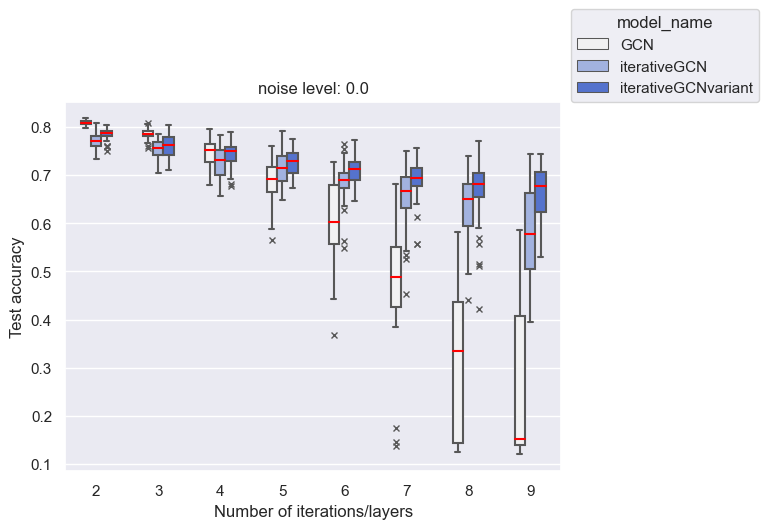

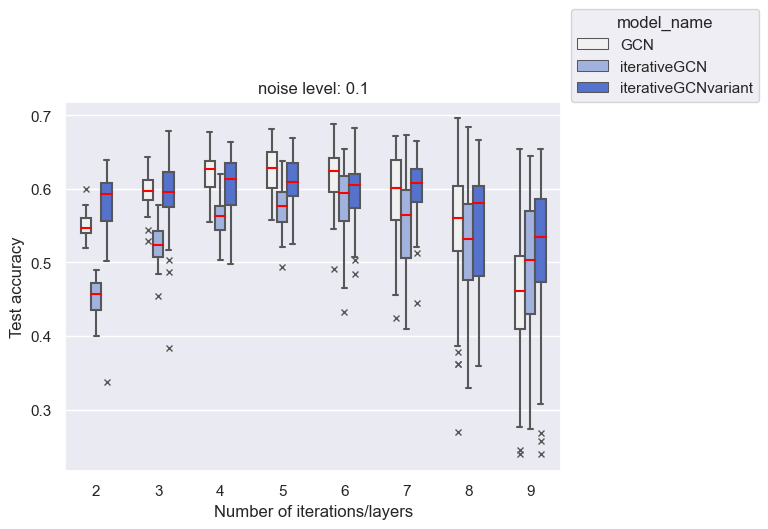

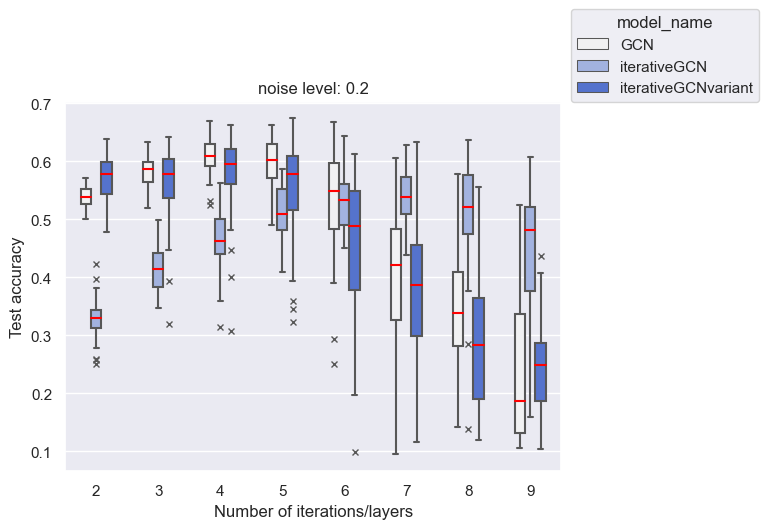

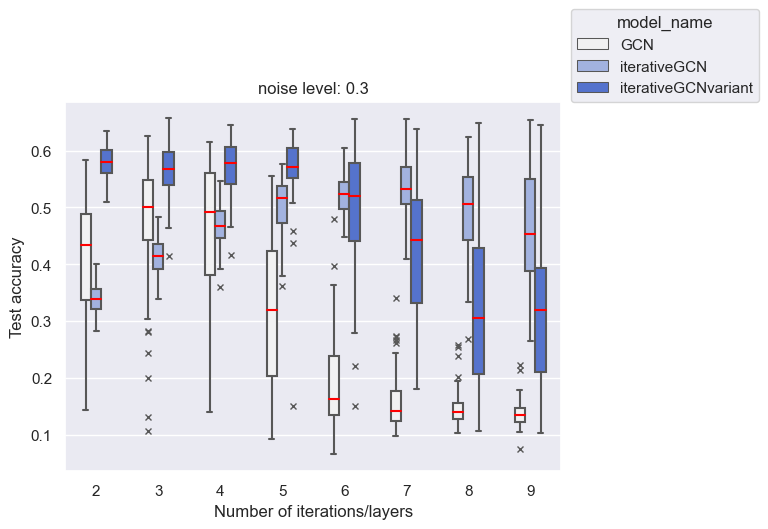

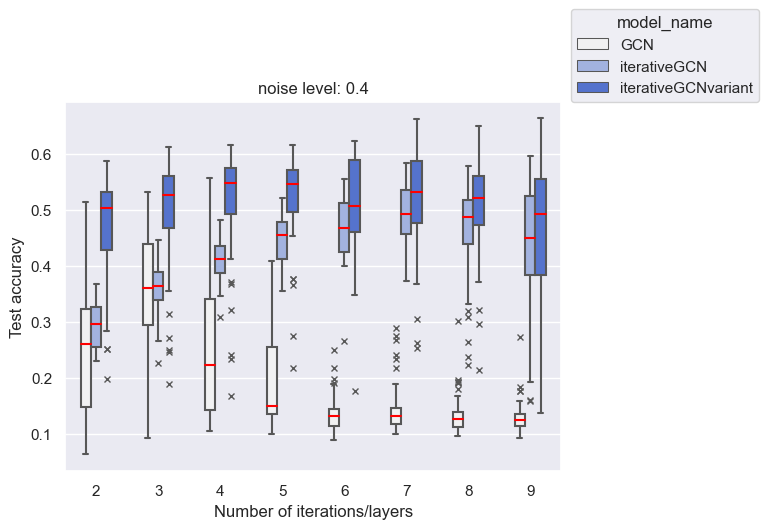

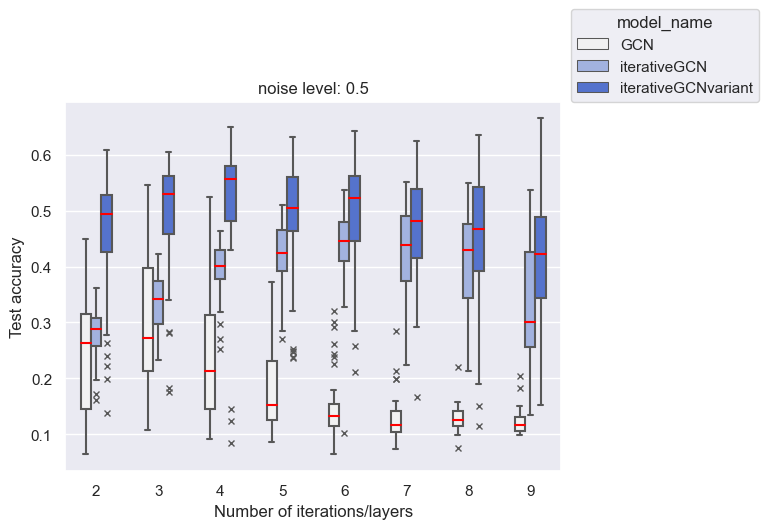

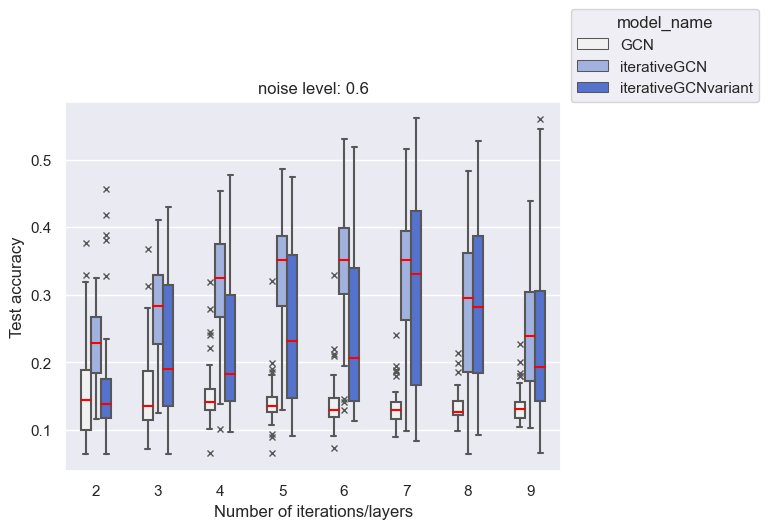

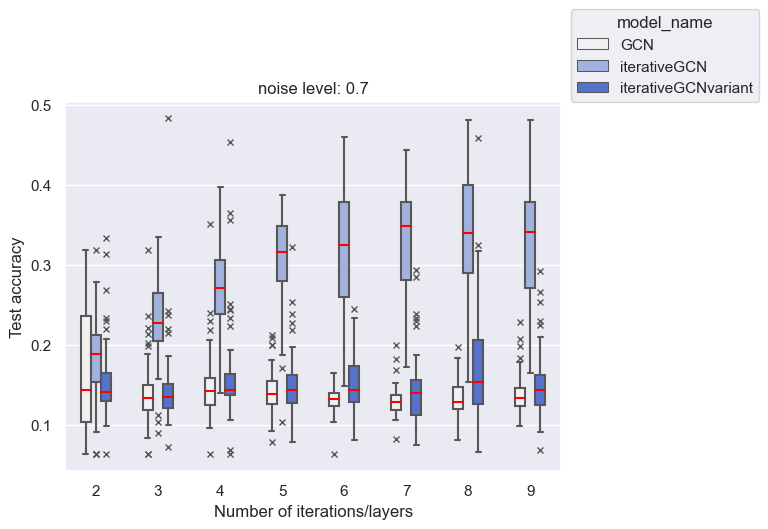

In [16]:
for noise_level in np.sort(pd.unique(df["noise_percent"])):
    dfn = df[df["noise_percent"] == noise_level]
    fig = plt.figure()
    sns.set(style="darkgrid")
    bp = sns.boxplot(x='num_iter_layers',
            y="test_accuracy",
            data=dfn,
            width=0.5,
            hue="model_name",
            flierprops={"marker": "x"},
            medianprops={"color": "red"},
            color="royalblue"
            )
    bp.set(title="noise level: "+str(noise_level), xlabel='Number of iterations/layers', ylabel='Test accuracy')
    sns.move_legend(bp, loc=(1.02, 1))
    name = "noise_level_"+str(noise_level)+".png"
    fig.savefig(name, bbox_inches='tight')
    

# Plot boxplots for both models in one graph for each noise level

In [ ]:
for noise_level, (usual_sweep_id, iterative_sweep_id, variant_sweep_id) in enumerate(zip(usual_sweeps, iterative_sweeps, variant_sweeps)):
    u_ta, u_nl = get_metrics(usual_sweep_id)
    u_model = ["GCN"] * len(u_nl)
    i_ta, i_ni = get_metrics(iterative_sweep_id)
    i_model = ["iterativeGCN"] * len(i_ni)
    v_ta, v_ni = get_metrics(variant_sweep_id)
    v_model = ["iterativeGCNvariant"] * len(v_ni)
    
    ta = u_ta + i_ta + v_ta
    ni = u_nl + i_ni + v_ni
    md = u_model + i_model + v_model
    assert len(ta) == len(u_ta) + len(i_ta) + len(v_ta)
    assert len(ni) == len(u_nl) + len(i_ni) + len(v_ni)
    assert len(md) == len(u_model) + len(i_model) + len(v_model)

    data = pd.DataFrame({
    "test accuracy": ta,
    "number of iterations/layers": ni,
    "model type": md
    })
    plt.figure()
    sns.set(style="darkgrid")
    bp = sns.boxplot(x='number of iterations/layers',
            y="test accuracy",
            data=data,
            width=0.5,
            hue="model type",
            flierprops={"marker": "x"},
            medianprops={"color": "red"},
            color="royalblue"
            )
    bp.set(title="noise level: "+str(noise_level/10))
    sns.move_legend(bp, loc=(1.02, 1))
    fig = bp.get_figure()
    name = "noise_level_"+str(noise_level/10)+".png"
    fig.savefig(name)

In [ ]:
usual_dfs = []
iter_dfs = []
var_dfs = []
for noise_level, (usual_sweep_id, iterative_sweep_id, variant_sweep_id) in enumerate(zip(usual_sweeps, iterative_sweeps, variant_sweeps)):
    usual_dfs.append(get_clean_sweep_runs(usual_sweep_id))
    iter_dfs.append(get_clean_sweep_runs(iterative_sweep_id))
    var_dfs.append(get_clean_sweep_runs(variant_sweep_id))


In [ ]:
usual_df = pd.concat(usual_dfs)
iter_df = pd.concat(iter_dfs)
var_df = pd.concat(var_dfs)

In [ ]:
iter_df

# Other stuff

In [ ]:
for noise_level, (usual_sweep_id, iterative_sweep_id, variant_sweep_id) in enumerate(zip(usual_sweeps, iterative_sweeps, variant_sweeps)):
    u_ta, u_nl = get_metrics(usual_sweep_id)
    i_ta, i_ni = get_metrics(iterative_sweep_id)
    v_ta, v_ni = get_metrics(variant_sweep_id)

    mean_uta, std_uta = np.mean(u_ta), np.std(u_ta)
    mean_ita, std_ita = np.mean(i_ta), np.std(i_ta)  
    mean_vta, std_vta = np.mean(v_ta), np.std(v_ta)
    
    print("Noise: ", noise_level)
    print(mean_uta, std_uta)
    print(mean_ita, std_ita)
    print(mean_vta, std_vta)
